In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/Users/kristalshrestha/Code/MachineLearning100Days/End_to_End_toy_project/placement.csv')


In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

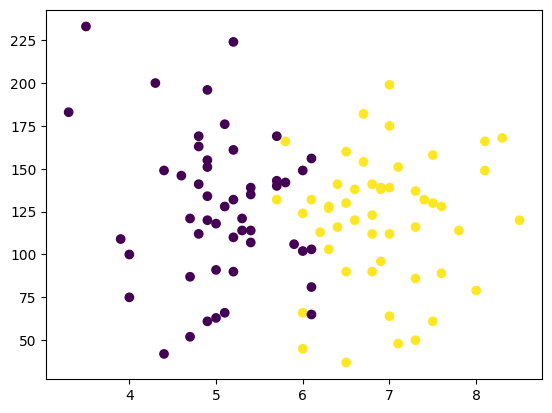

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

x carrying independent variables


In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
x.shape

(100, 2)

In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,cgpa,iq
91,7.5,158.0
2,5.3,121.0
0,6.8,123.0
27,6.0,124.0
42,7.6,89.0
...,...,...
55,7.8,114.0
82,6.5,37.0
7,5.0,63.0
72,7.3,116.0


In [18]:
y_train

91    1
2     0
0     1
27    1
42    1
     ..
55    1
82    1
7     0
72    1
18    0
Name: placement, Length: 90, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)

In [22]:
x_train

array([[ 1.36286136,  0.95627135],
       [-0.67525457, -0.01665367],
       [ 0.71436993,  0.03593687],
       [-0.02676314,  0.06223214],
       [ 1.455503  , -0.85810234],
       [ 0.8996532 , -0.25331111],
       [-0.02676314, -1.46289356],
       [-1.87959581, -1.22623613],
       [-1.13846274,  1.0877477 ],
       [-1.50902927, -2.09398006],
       [ 1.82606953, -1.12105504],
       [-0.95317947, -0.80551179],
       [ 0.6217283 ,  0.85109026],
       [-0.76789621,  0.27259431],
       [-0.11940477, -0.41108273],
       [ 0.8996532 ,  2.03437745],
       [ 0.43644503,  0.22000377],
       [-1.04582111,  0.32518485],
       [ 0.06587849, -1.48918883],
       [ 0.8996532 ,  1.40329095],
       [-0.30468804,  0.48295647],
       [ 0.71436993,  0.50925174],
       [-0.76789621, -0.30590165],
       [ 1.455503  ,  0.16741322],
       [-0.58261294, -0.20072057],
       [-0.02676314, -2.01509425],
       [ 0.6217283 ,  1.58735784],
       [ 2.10399443,  1.21922405],
       [ 1.27021973,

In [23]:
x_test=scaler.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf=LogisticRegression()

In [26]:
#this is model training
clf.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=clf.predict(x_test)

In [28]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [29]:
y_test

32    1
73    0
95    0
69    1
77    1
17    0
80    0
75    0
76    0
48    1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

1.0

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

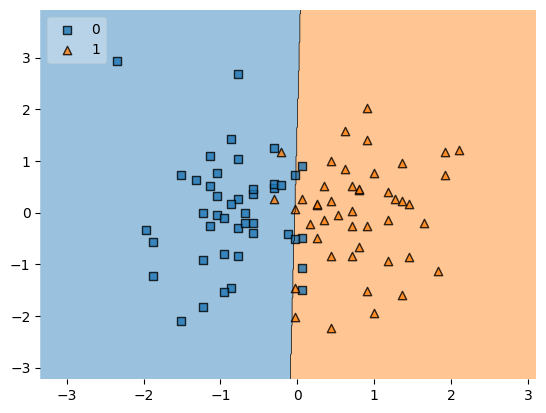

In [33]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [34]:
import pickle

In [35]:
pickle.dump(clf,open('model.pkl','wb'))

In [36]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [37]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model